In [1]:
import os
import numpy as np 
# --- provabgs --- 
from provabgs import util as UT
from provabgs import models as Models

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
m_nmf = Models.NMF(burst=False, emulator=False)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [4]:
thetas = np.array([
    np.array([0., 1., 0., 0., 0., 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 0., 1., 0., 0., 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 0., 0., 1., 0., 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 0., 0., 0., 1., 1e-3, 1e-3, 0, 0, 0])
])

(1000.0, 10000.0)

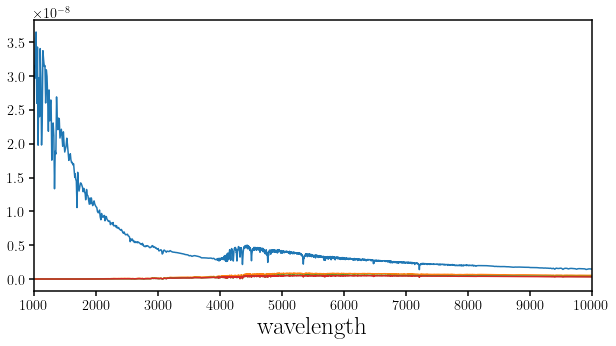

In [5]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for theta in thetas: 
    w, f = m_nmf.sed(theta, 0.1)
    sub.plot(w, f)
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)

In [6]:
m_nmf = Models.NMF(burst=True, emulator=False)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [7]:
thetas = np.array([
    np.array([0., 1., 0., 0., 0., 0.1, 0.1, 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 1., 0., 0., 0., 0.2, 0.2, 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 1., 0., 0., 0., 0.3, 1., 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 1., 0., 0., 0., 0.5, 5., 1e-3, 1e-3, 0, 0, 0])
])

(1000.0, 10000.0)

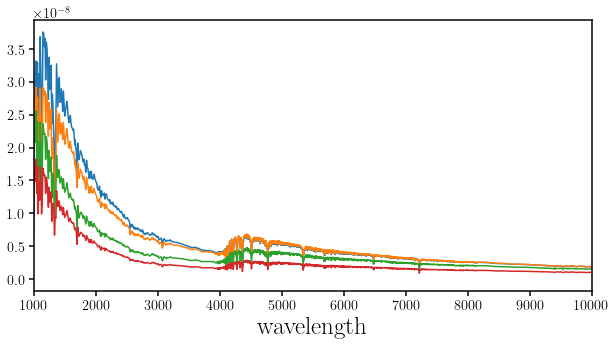

In [8]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for theta in thetas: 
    w, f = m_nmf.sed(theta, 0.1)
    sub.plot(w, f)
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)

In [9]:
theta0 = np.array([0., 1., 0., 0., 0., 0.0, 0.1, 1e-3, 1e-3, 0, 0, 0])
theta1 = np.array([0., 1., 0., 0., 0., 1., 0.1,  1e-3, 1e-3, 0, 0, 0])
theta2 = np.array([0., 1., 0., 0., 0., 0.5, 0.1,  1e-3, 1e-3, 0, 0, 0])

(1000.0, 10000.0)

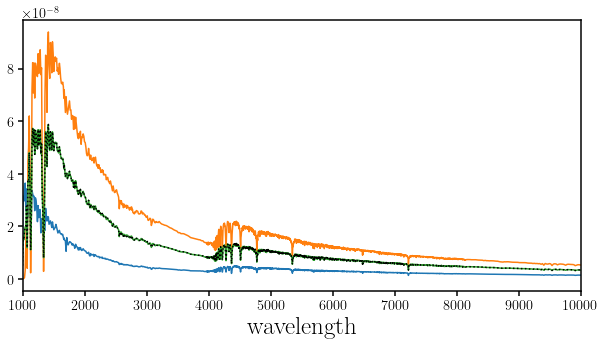

In [12]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for theta in [theta0, theta1, theta2]: 
    w, f = m_nmf.sed(theta, 0.1)
    sub.plot(w, f)
    
_, f0 = m_nmf.sed(theta0, 0.1)
_, f1 = m_nmf.sed(theta1, 0.1)
sub.plot(w, 0.5 * f0 + 0.5 * f1, c='k', ls=':')
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)

In [11]:
%timeit m_nmf.sed(theta2, 0.1)

169 ms ± 4.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
